/tmp/ipykernel_55558/3463617561.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gag_time_over_issue_date_df__year = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).mean()
/tmp/ipykernel_55558/3463617561.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),


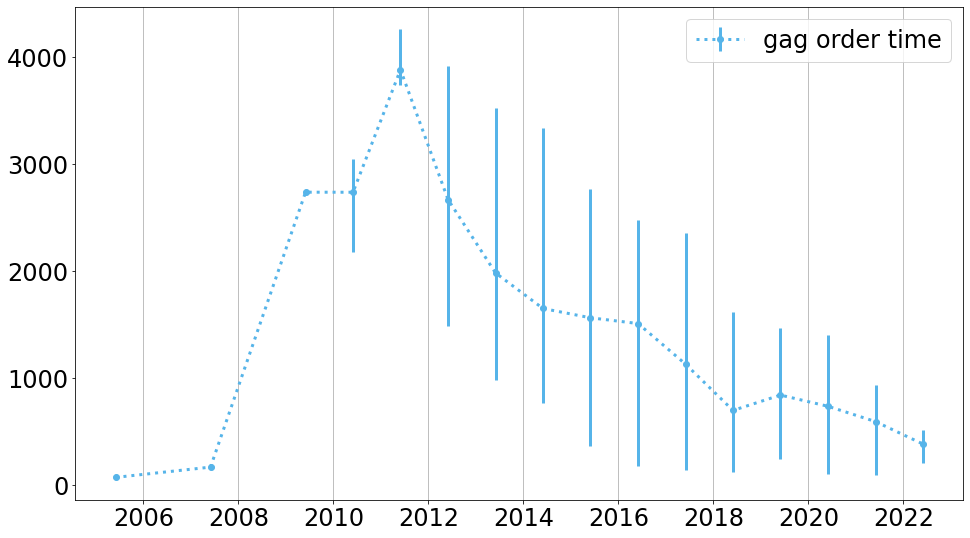

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

EXTRACTED_DATA_PATH = "../../data/extracted"
OUTPUT_DATA_DIR = "../../data/processed"

colors = plt.cm.get_cmap('hsv', 50)

# Read data
csv_google = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_google.csv')
csv_apple = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_apple.csv')
csv_nslarchive = pd.read_csv(f'{EXTRACTED_DATA_PATH}/nsl_letters_nslarchive.csv')
csv = pd.concat([csv_google, csv_apple, csv_nslarchive])

# earlier date when the letter is served
csv['nsl_issue_dates'] = nsl_issue_dates = [datetime.strptime(val, "%Y-%m-%d") for val in csv['issue date'].values]

# later date when the letter is published
csv['nsl_release_dates'] = nsl_release_dates = [datetime.strptime(val, "%Y-%m-%d") for val in csv['release date'].values]

# proxy for gag order time: difference between issue and release dates
gag_time = [(nsl_release_dates[i] - nsl_issue_dates[i]).days for i in range(len(nsl_release_dates))]

# Sort nsls by issue dates
nsl_issue_dates_zip_gag_time = zip(nsl_issue_dates, gag_time)
nsl_issue_dates_zip_gag_time_s = sorted(nsl_issue_dates_zip_gag_time, key=lambda x: x[0])
nsl_issue_dates_s, gag_time_s = zip(*nsl_issue_dates_zip_gag_time_s)
gag_time_s = [float(ss) for ss in gag_time_s]

# Create pandas frame for the inferred gag time over issue dates 
gag_time_over_issue_date_df = pd.DataFrame({'nsl_issue_dates' : nsl_issue_dates_s, 'gag_time' : gag_time_s}, columns=['nsl_issue_dates', 'gag_time'])

# Aggregate the data per year, compute the mean, minimum, and maximum for every year
gag_time_over_issue_date_df__year = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).mean()
gag_time_over_issue_date_df__year_min = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).min()
gag_time_over_issue_date_df__year_max = gag_time_over_issue_date_df.groupby(gag_time_over_issue_date_df.nsl_issue_dates.dt.year).max()

# Plot the gag order time
plt.rc("axes", axisbelow=True)
plt.rcParams["font.size"] = 24
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["figure.figsize"] = (14,8)
plt.ticklabel_format(style='plain')

plt.errorbar([datetime(v, 6, 1) for v in gag_time_over_issue_date_df__year.index.values], gag_time_over_issue_date_df__year['gag_time'].values.tolist(),
   yerr =  (np.array(gag_time_over_issue_date_df__year['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year_min['gag_time'].values.tolist()),
            np.array(gag_time_over_issue_date_df__year_max['gag_time' ].values.tolist()) - np.array(gag_time_over_issue_date_df__year['gag_time'].values.tolist())),
   linestyle='dotted', marker='o', label="gag order time", color="#56b4e9", fmt='o', elinewidth=3, linewidth=3)

plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.grid(axis="y")
plt.legend()                                                                                                                                                                        
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.pdf")
plt.savefig(f"{OUTPUT_DATA_DIR}/mean_gag_time_over_time_yearly_date_let__errorbar.png")